### 1. Core idea (before code)
* x is a vector in 2D space
* W is a 2×2 matrix
* y = W · x rotates, stretches, compresses, or flips x
* Learning in ML means changing W to get desired transformations

### 2. Simple 2D vector transformation

In [8]:
import numpy as np
# input vector
x = np.array([1,1])
# weight matrix
W = np.array([
    [1,0],
    [0,-2]
])
# linear transformation
y = W@x
print("Input vector x:",x)
print("Output vector y:",y)

Input vector x: [1 1]
Output vector y: [ 1 -2]


#### Interpretation
* x points at (1,1)
* W stretches the x-axis by 2
* Direction changes, length changes

### 3. Visualizing input vs output vector

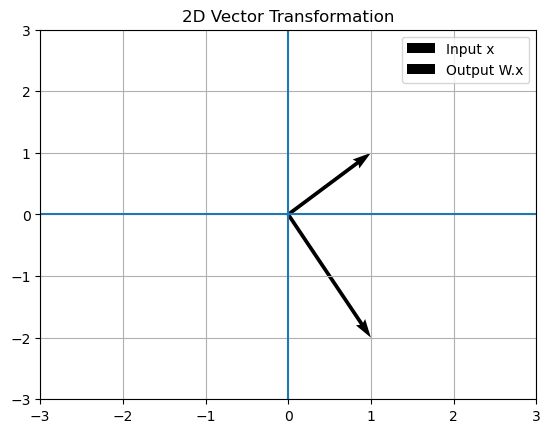

In [9]:
import matplotlib.pyplot as plt
# plot origin
origin = np.array([0,0])
plt.quiver(*origin.T,x[0],x[1],angles='xy',scale_units ='xy',scale=1)
plt.quiver(*origin.T,y[0],y[1],angles='xy',scale_units ='xy',scale=1)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0)
plt.axvline(0)
plt.grid()

plt.legend(['Input x', "Output W.x"])
plt.title("2D Vector Transformation")
plt.show()

#### What you see
* Arrow 1: original input
* Arrow 2: transformed output
* Same origin, different direction and length

### 4. Visualizing transformation of many points (space warping)

This shows how W transforms the entire input space, not just one vector.

In [11]:
# create grid of points
x_vals = np.linspace(-2,2,10)
y_vals = np.linspace(-2,2,10)

points = np.array([[x,y] for x in x_vals for y in y_vals])
# apply transformation
transformed = points@ W.T

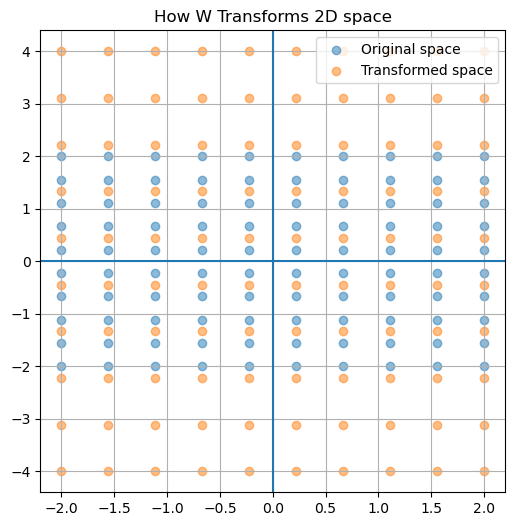

In [12]:
plt.figure(figsize=(6,6))
# original space
plt.scatter(points[:,0],points[:,1],alpha=0.5)
# transformed space
plt.scatter(transformed[:,0],transformed[:,1],alpha=0.5)

plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.legend(["Original space","Transformed space"])
plt.title("How W Transforms 2D space")
plt.show()

#### ML intuition
* Linear layers reshape space
* Classification becomes easier after transformation
* Multiple layers = repeated space reshaping

### 5. Rotation matrix example (direction change only)

In [13]:
theta = np.pi/4 
W_rot = np.array([
    [np.cos(theta),-np.sin(theta)],
    [np.sin(theta),np.cos(theta)]
])
y_rot = W_rot @ x
print("Rotated vector:",y_rot)

Rotated vector: [0.         1.41421356]


### Try visualizing this with the earlier plot code.

Interpretation
* Direction changes
* Length stays the same
* Neural nets learn these rotations implicitly

### 6. Scaling + shearing (what real weights do)

In [14]:
W_complex = np.array([[1.5, 0.8],
                      [0.2, 1.0]])

y_complex = W_complex @ x


This matrix:
* Stretches
* Tilts
* Mixes features

That “mixing” is feature learning.

### 7. Why this matters in ML
* Each layer does W · x + b
* Nonlinearities decide what survives
* Training adjusts W so space bends toward correct predictions

### Practice ideas
* 1.Change W and predict what will happen before plotting
* 2. Try a matrix with negative values
* 3. Stack two matrices and visualize combined effect
* 4. Plot decision boundaries after transformation